# Clustering Assignment

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

## 1.Importing Libraries

In [54]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [55]:
# Importing warnings
import warnings
warnings.filterwarnings('ignore')

## 2.Reading the dataset

In [56]:
# Reading the dataset
df = pd.read_csv("Country-data.csv")

In [57]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 2.1 Data Inspection

In [58]:
# checking information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [59]:
# checking summary of data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [60]:
# checking the number of rows and columns
df.shape

(167, 10)

In [61]:
# checking if column country has unique values
df.country.value_counts()

Vanuatu                     1
Lebanon                     1
Cape Verde                  1
Tunisia                     1
Costa Rica                  1
Cameroon                    1
India                       1
Nigeria                     1
China                       1
Kazakhstan                  1
Iceland                     1
Luxembourg                  1
Antigua and Barbuda         1
Greece                      1
Micronesia, Fed. Sts.       1
Bosnia and Herzegovina      1
Cambodia                    1
Colombia                    1
Japan                       1
Russia                      1
Congo, Rep.                 1
Slovenia                    1
Botswana                    1
Israel                      1
Germany                     1
Belarus                     1
Sudan                       1
Afghanistan                 1
Guyana                      1
Sweden                      1
                           ..
Bolivia                     1
Dominican Republic          1
Georgia   

In [62]:
#converting exports, imports and health columns to their original values 
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [63]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 3. EDA

## Univariate Analysis

In [64]:
#creating comparison charts for country vs all other columns for top 5 and bottom 5 values
def comparison_charts(col):
    Country=df[['country', col]].sort_values(by= col,ascending=False)
    country1=Country.head()
    country2=Country.tail()
    plt.figure(figsize=(20, 6))
    plt.subplot(1,2,1)
    sns.barplot(country1.country, country1[country1.columns[1]])
    plt.title('Countries having high {0}'.format(col),fontweight="bold", size=20)
    plt.subplot(1,2,2)
    sns.barplot(country2.country, country2[country2.columns[1]])
    plt.title('Countries having low {0}'.format(col),fontweight="bold", size=20)
    plt.show()

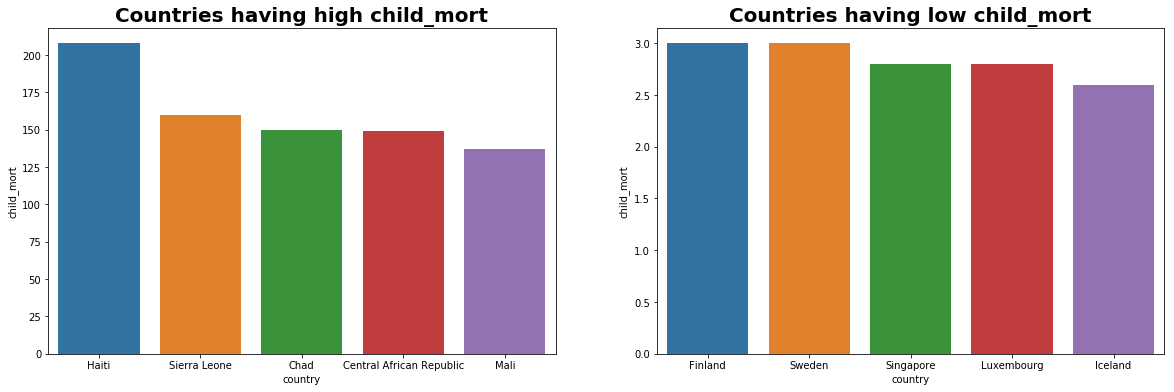

In [65]:
comparison_charts(df.columns[1])

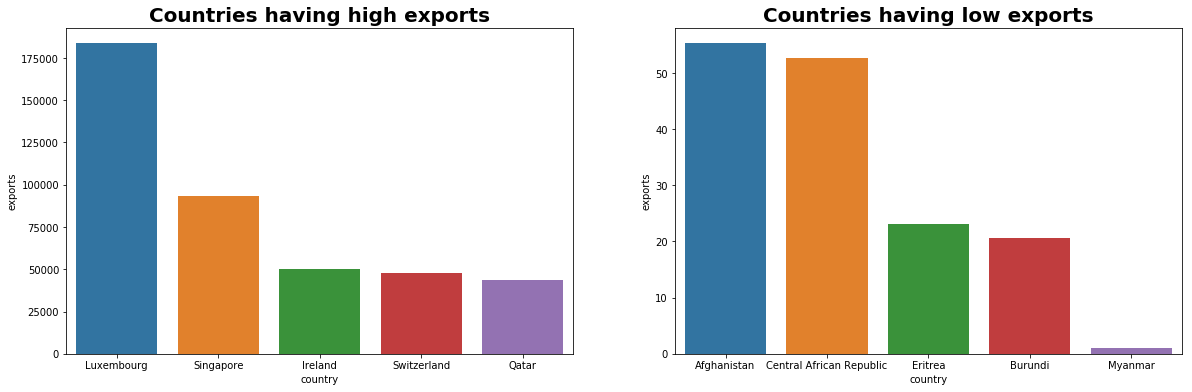

In [66]:
comparison_charts(df.columns[2])

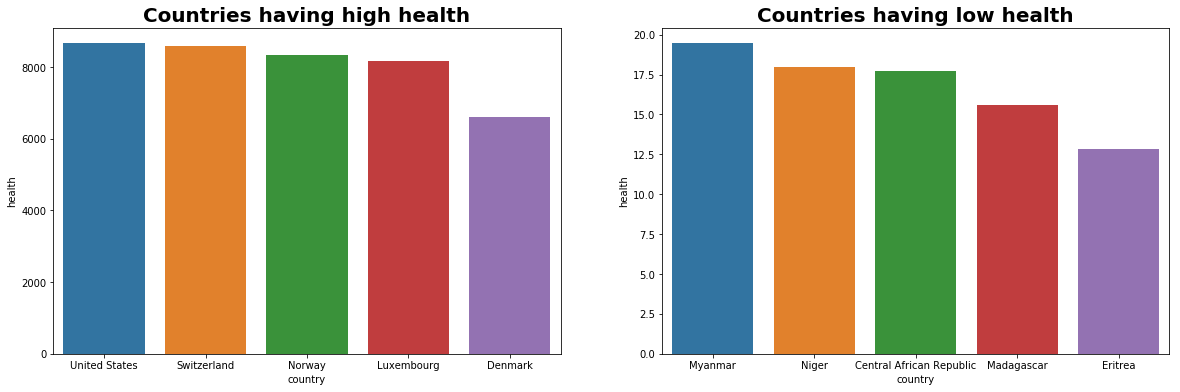

In [67]:
comparison_charts(df.columns[3])

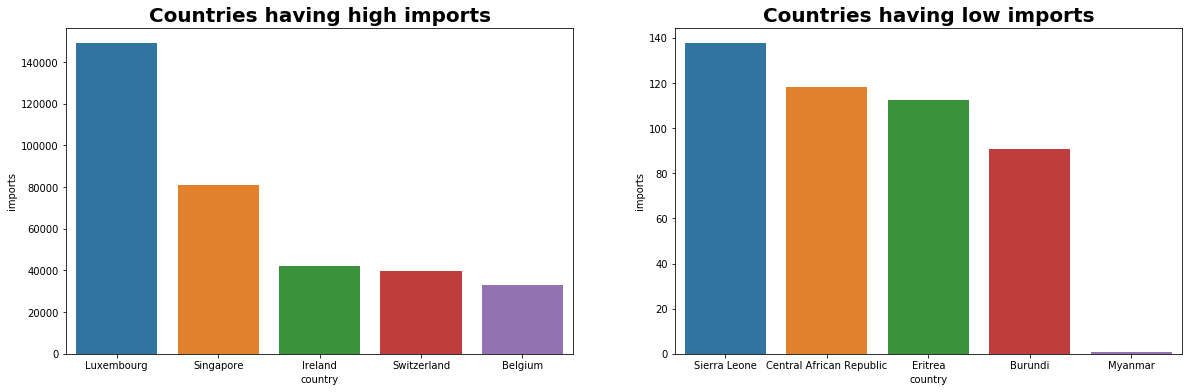

In [68]:
comparison_charts(df.columns[4])

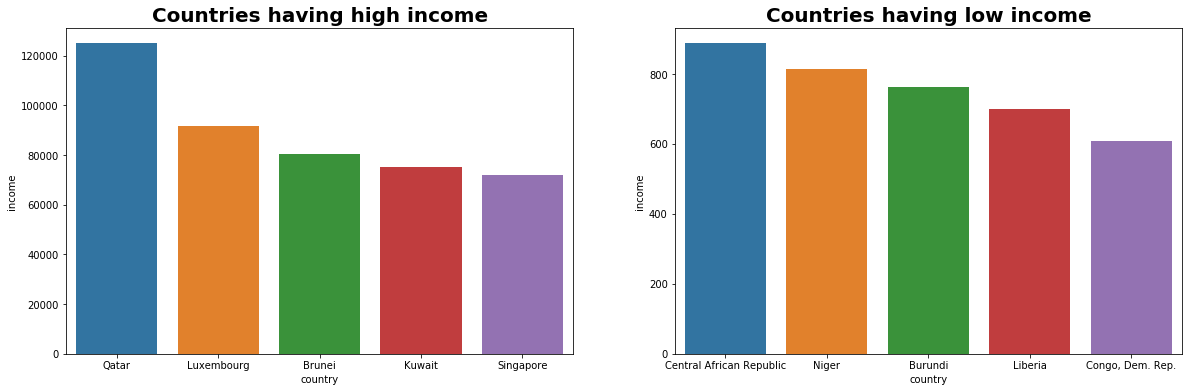

In [69]:
comparison_charts(df.columns[5])

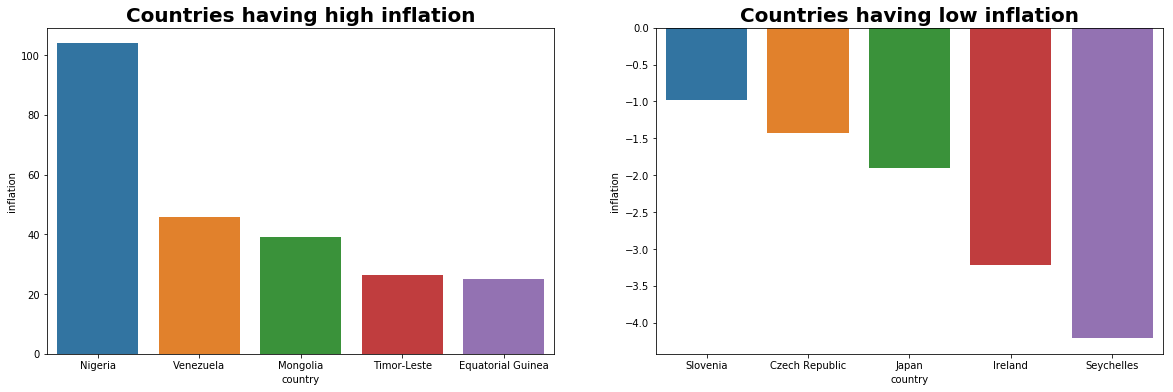

In [70]:
comparison_charts(df.columns[6])

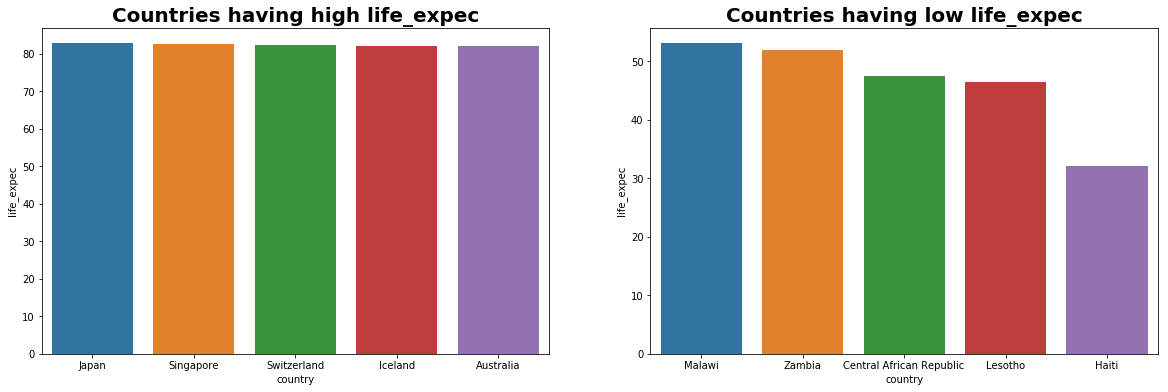

In [71]:
comparison_charts(df.columns[7])

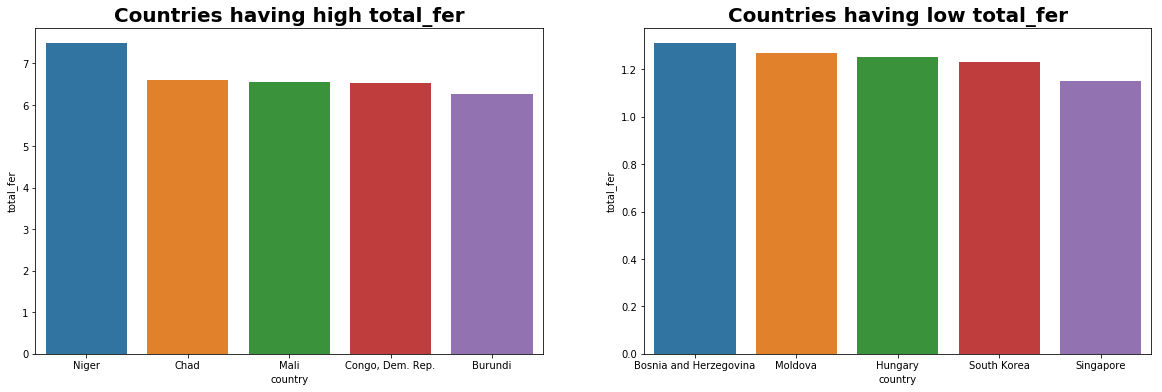

In [72]:
comparison_charts(df.columns[8])

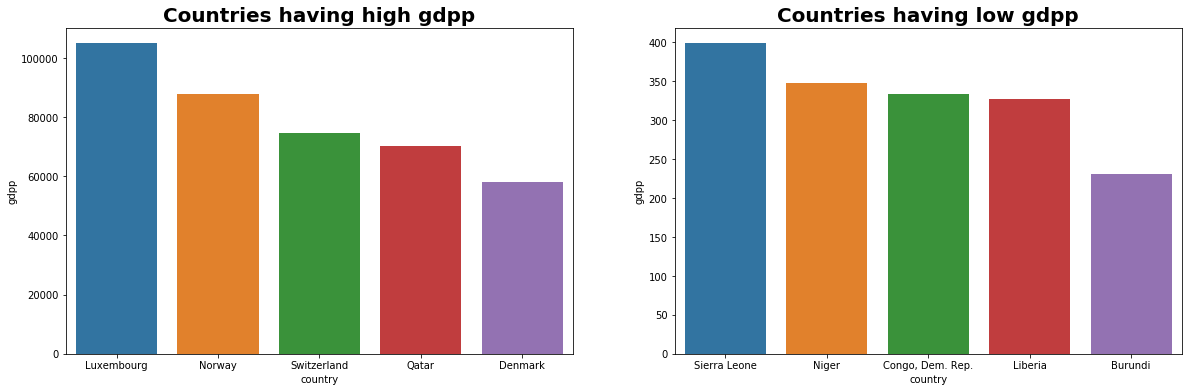

In [73]:
comparison_charts(df.columns[9])

## Bivariate Analysis

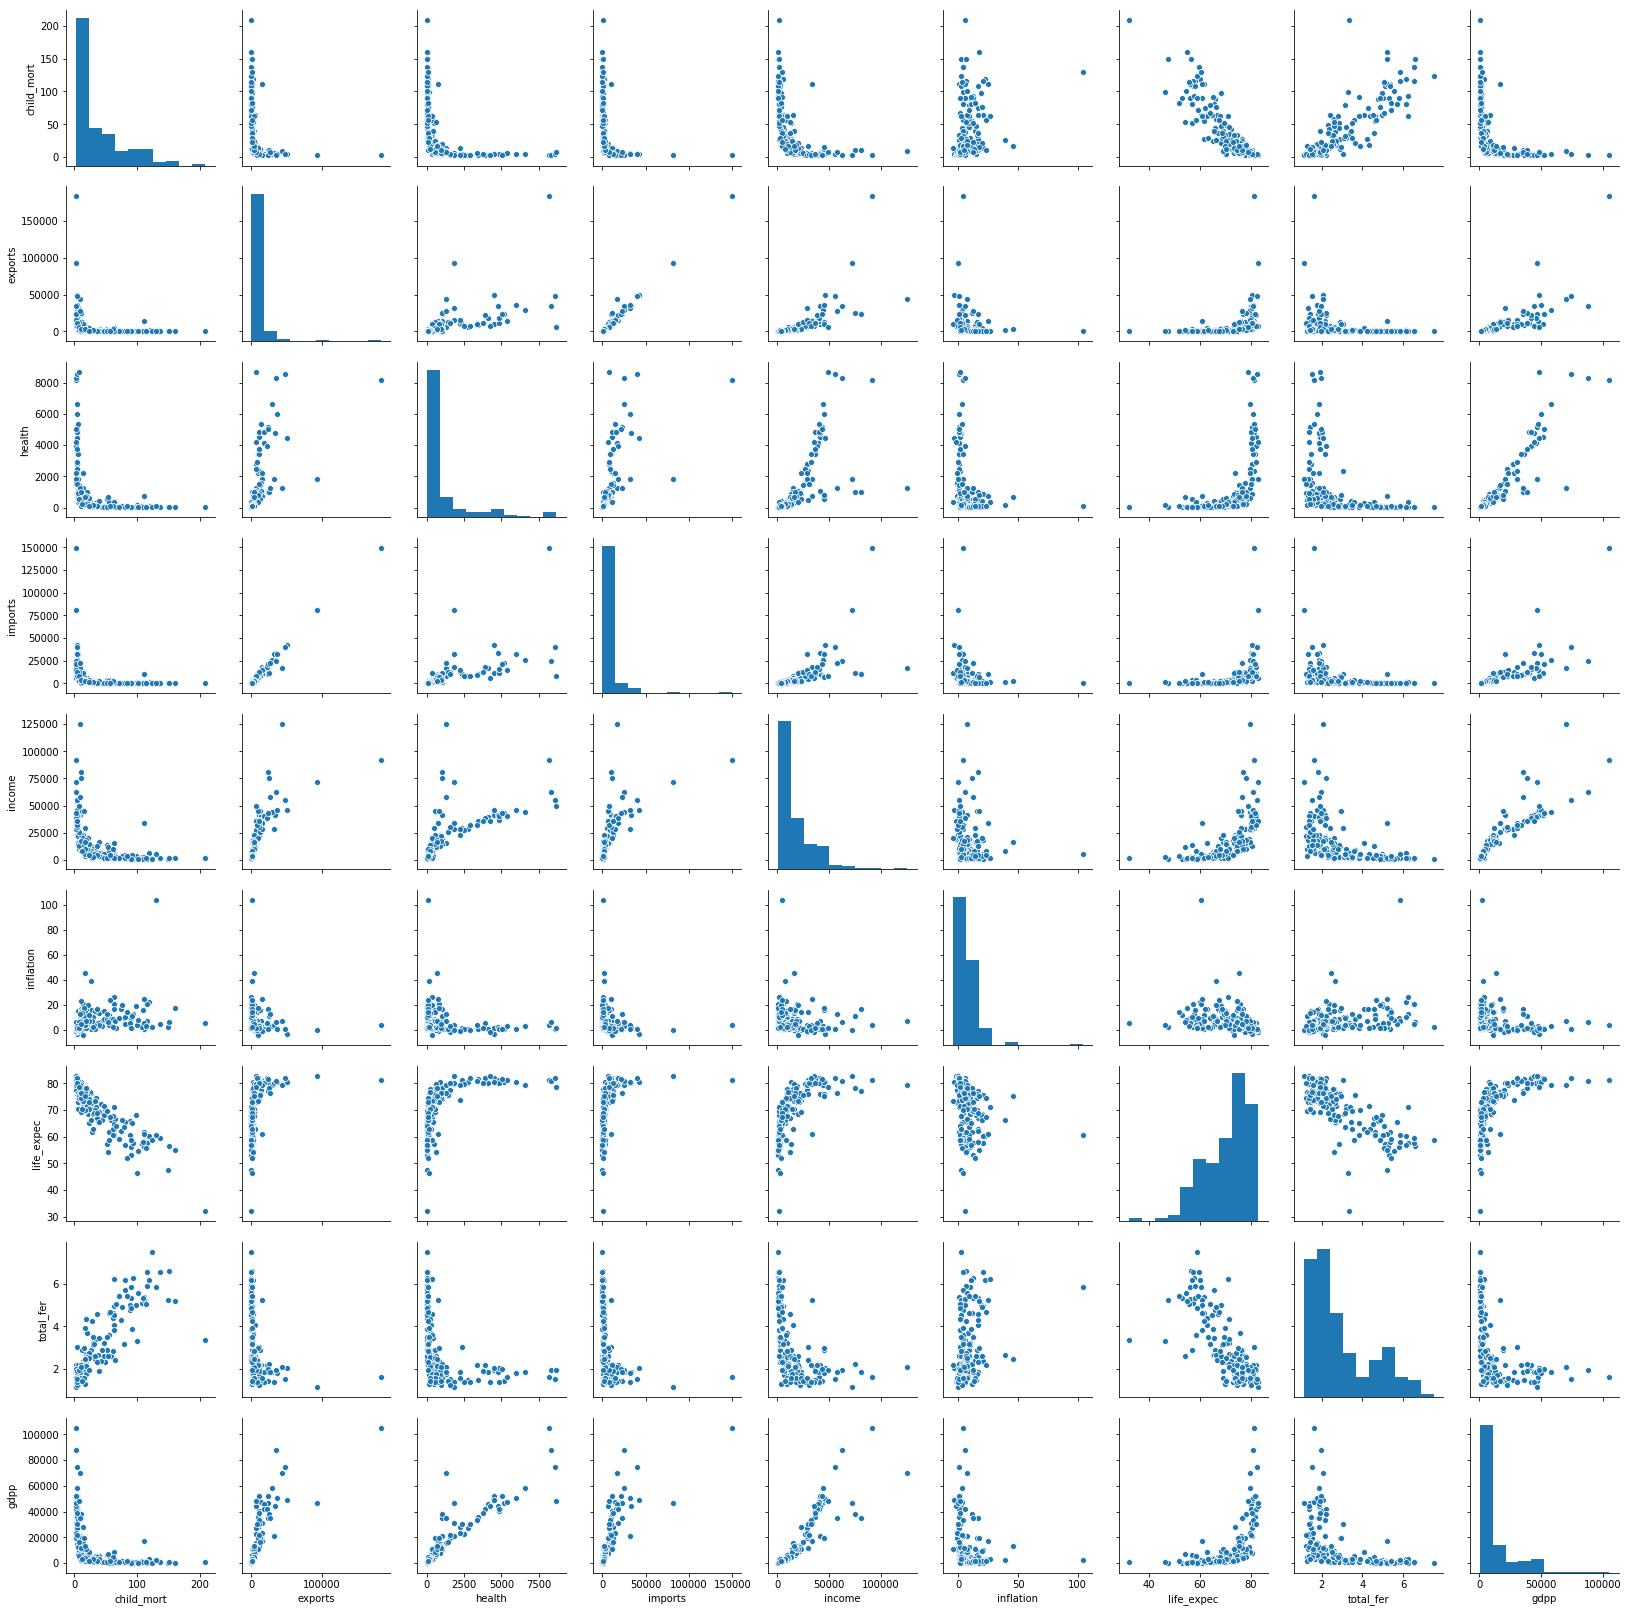

In [74]:
# bivariate analysis of numeric columns
sns.pairplot(df.select_dtypes(['int64','float64']))
plt.show()

#### Checking the distribution of data

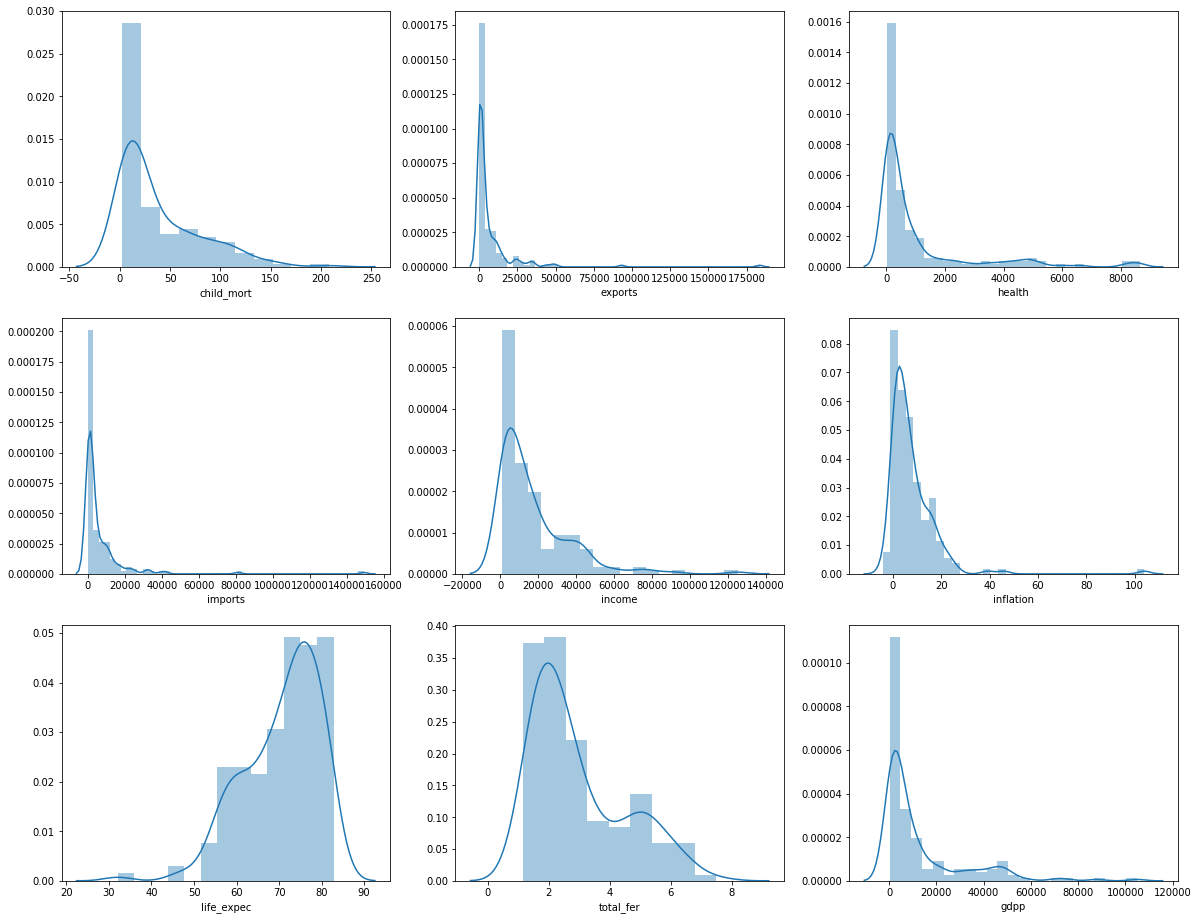

In [75]:
# inspecting the distribution of columns
plt.figure(figsize = (20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]])
    

Distribution of income, gdpp and child mortality shows signs of cluster formation.

## 4.Outlier Analysis

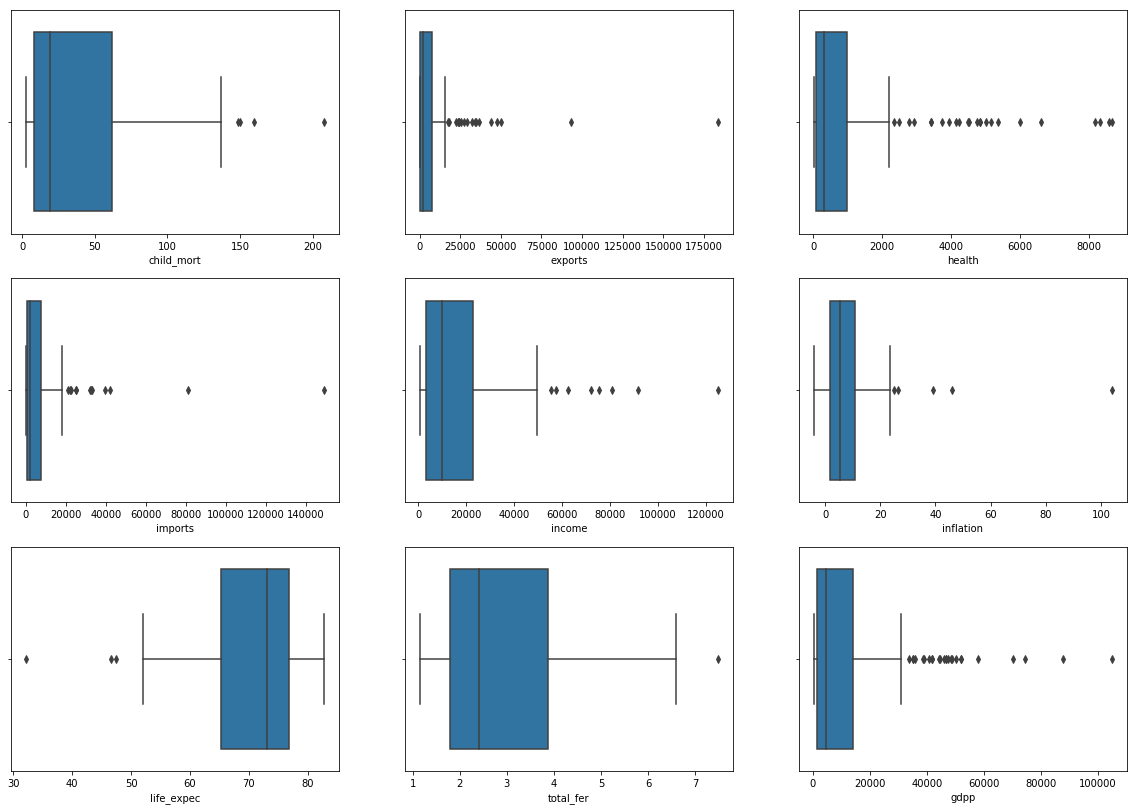

In [76]:
# finding the outliers of numerical columns
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

Every numerical columns has outliers so based on the business aspect capping can be done on the data.

In [77]:
# soft capping of columns, cap the lower values of child mortality, inflation and total fertility columns
#and do upper value capping for other columns 
q1 = df['child_mort'].quantile(0.01)
q2 = df['exports'].quantile(0.99)
q3 = df['health'].quantile(0.99)
q4 = df['imports'].quantile(0.99)
q5 = df['income'].quantile(0.99)
q6 = df['inflation'].quantile(0.01)
q7 = df['life_expec'].quantile(0.99)
q8 = df['total_fer'].quantile(0.01)
q9 = df['gdpp'].quantile(0.99)

df['child_mort'][df['child_mort']<=q1] = q1
df['exports'][df['exports']>=q2] = q2
df['health'][df['health']>=q3] = q3
df['imports'][df['imports']>=q4] = q4
df['income'][df['income']>=q5] = q5
df['inflation'][df['inflation']<=q6] = q6
df['life_expec'][df['life_expec']>=q7] = q7
df['total_fer'][df['total_fer']<=q8] = q8
df['gdpp'][df['gdpp']>=q9] = q9


In [78]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.798194,70.551138,2.948601,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,10.553699,8.886987,1.513108,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-2.348800,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,104.000000,82.370000,7.490000,79088.000000


In [79]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## 5. Hopkins Check

In [80]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [81]:
# checking hopkins score
hopkins(df.drop("country", axis = 1))

0.8918276232740849

hopkins score was checked 10 times and was found to be above 80%, so clustering can be done on the data.

In [82]:
# fitting the data
ss = StandardScaler()
df1 = ss.fit_transform(df.drop("country", axis = 1))
df1

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.62498101, -0.6500669 ]])

In [83]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.569622,-0.566958,-0.598741,-0.851668,0.156035,-1.619705,1.903390,-0.702259
1,-0.538993,-0.473858,-0.440393,-0.413584,-0.386946,-0.314406,0.648831,-0.860816,-0.498726
2,-0.272870,-0.424000,-0.486271,-0.476100,-0.221053,0.788991,0.671403,-0.038846,-0.477434
3,2.007831,-0.381249,-0.534088,-0.463973,-0.612045,1.387733,-1.179541,2.128769,-0.530950
4,-0.695682,-0.086742,-0.178410,0.139728,0.125254,-0.604273,0.705262,-0.542634,-0.032042


## 6. K means clustering

#### Silhouette score method

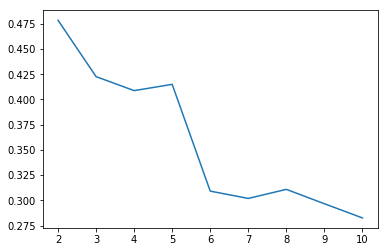

In [84]:
# finding k using silhouette score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

k value from silhouette score method is 3

#### Elbow curve method

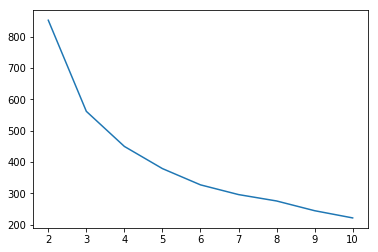

In [85]:
# ssd elbow curve for finding k value
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

k value from elbow curve method is 3

In [86]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [87]:
# assigning labels to clusters
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [88]:
df['cluster_id'] = kmean.labels_

In [89]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [90]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

1    92
0    48
2    27
Name: cluster_id, dtype: int64

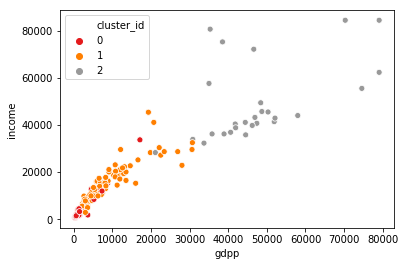

In [91]:
# plotting income, gdpp and child mortality
sns.scatterplot(x = 'gdpp', y ='income', hue = 'cluster_id', data =df, palette = 'Set1')
plt.show()

cluster 0 is the low income low gdpp group

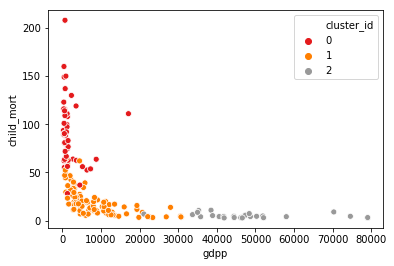

In [92]:
sns.scatterplot(x = 'gdpp', y ='child_mort', hue = 'cluster_id', data =df, palette = 'Set1')
plt.show()

cluster 0 is the high child mortality low gdpp group 

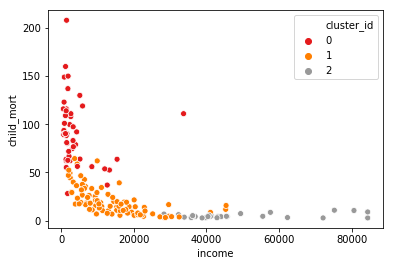

In [93]:
sns.scatterplot(x = 'income', y ='child_mort', hue = 'cluster_id', data =df, palette = 'Set1')
plt.show()

cluster 0 is the high child mortality low income group 

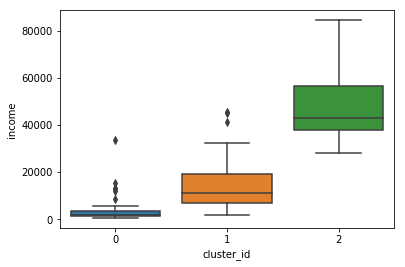

In [94]:
# boxplot of income of 3 clusters
sns.boxplot(x='cluster_id', y='income', data=df)
plt.show()

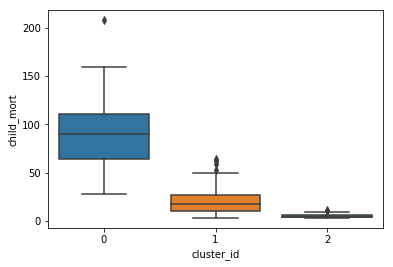

In [95]:
# boxplot of child mortality of 3 clusters
sns.boxplot(x='cluster_id', y='child_mort', data=df)
plt.show()

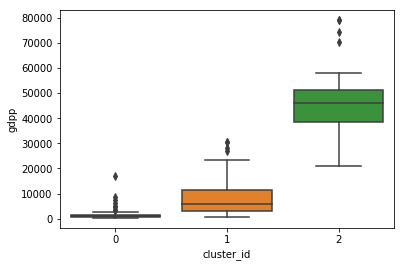

In [96]:
# boxplot of gdpp of 3 clusters
sns.boxplot(x='cluster_id', y='gdpp', data=df)
plt.show()

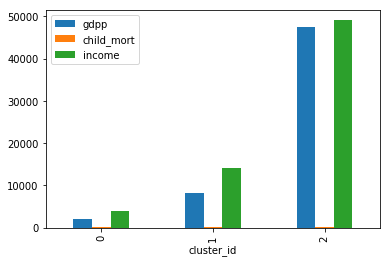

In [97]:
# barplot of income, gdpp, child mortality of 3 clusters
df[['gdpp', 'child_mort', 'income', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'bar')
plt.show()

In [98]:
# cluster 0 is our required cluster of under developed countries with low gdpp and 
#income and high child mortality
c0 = df[df['cluster_id']==0]
c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [99]:
# finding the top 10 countries high child mortality, low income and low gdpp using k means method
c0.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


## 7. Hierarchical Clustering

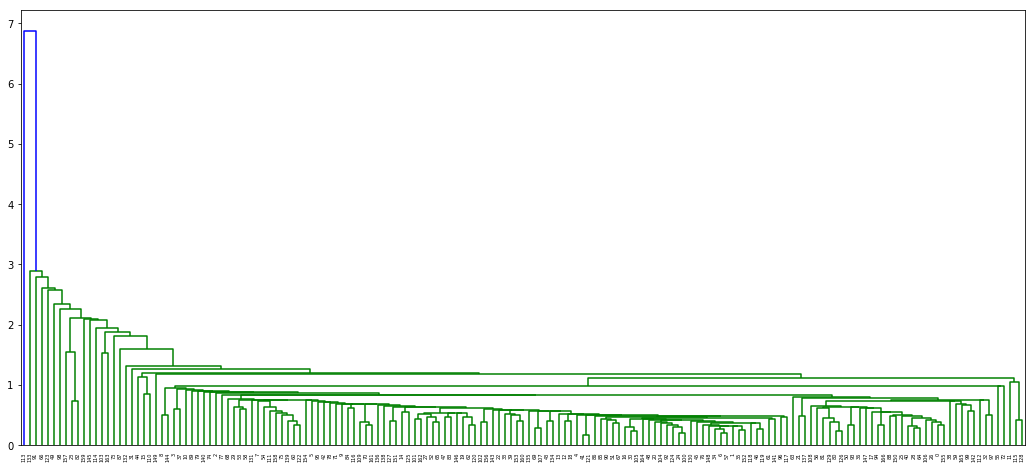

In [100]:
# single linkage
plt.figure(figsize = (18,8))
merging = linkage(df1, method="single", metric='euclidean')
dendrogram(merging)
plt.show()

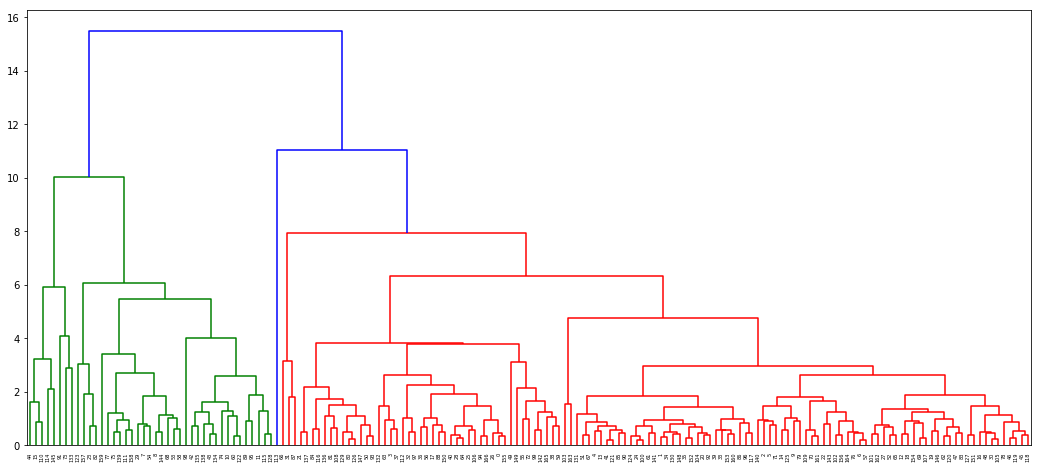

In [101]:
# complete linkage
plt.figure(figsize = (18,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [102]:
#No of clusters was taken as 3
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [103]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


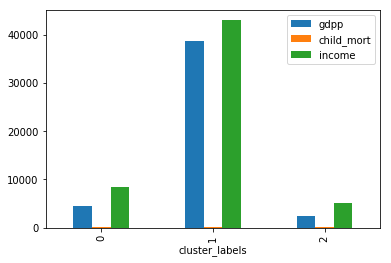

In [104]:
# barplot of the factors child mortality, gdpp, income
df[['gdpp', 'child_mort', 'income', 'cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')
plt.show()

Cluster 0 shows underdeveloped countries with low income and gdpp and high child mortality.

In [105]:
c1 = df[df['cluster_labels']==0]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [106]:
# finding the top 10 countries high child mortality, low income and 
#low gdpp using hierarchial clustering method
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0,0


#### Final Suggestions: 
    The results from Kmeans method can be considered as the final suggested countries.
    Hierarchical clustering method is not showing proper clusters here. It divides the whole data into two halves.
    Cluster 0 of the k means method shows the under developed countries with low income, low gdpp and high child mortality.
    The cluster 0 contains 48 countries, out of this 10 countries are suggested as the top 10 countries which are in direst need of aid. 
### So the top 10 countries are
    - Burundi
    - Liberia
    - Congo, Dem. Rep
    - Niger
    - Sierra Leone
    - Madagascar
    - Mozambique
    - Central African Republic	
    - Malawi
    - Eritrea